**Problem statement**: To predict the price of car based on the specification

**1. Importing the dataset with Pandas libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

#Getting the dataset
url = "/content/drive/MyDrive/ML Projects/automobile.csv"
df = pd.read_csv(url)
df.head()

Mounted at /content/drive


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


**2. Data cleaning**

In [3]:
# Data is missing in the following variables
'''
1. normalized-losses (Scale)
2. num-of-doors (Categorical)
3. bore (Scale)
4. stroke (Scale)
5. horsepower (Scale)
6. peak-rpm (Scale)
7. Price (Scale) '''

#Removing observation where price data is not available
df.replace("?",np.nan, inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [4]:
#Replacing NaN scale data with average
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean(), inplace=True)
df["bore"].replace(np.nan, df["bore"].astype("float").mean(), inplace=True)
df["stroke"].replace(np.nan, df["stroke"].astype("float").mean(), inplace=True)
df["horsepower"].replace(np.nan, df["horsepower"].astype("float").mean(), inplace=True)
df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype("float").mean(), inplace=True)
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**3. Exploratory Data Analysis(EDA)**

Now, filtering down the relevant features impacting price will help us take relevant features in model building

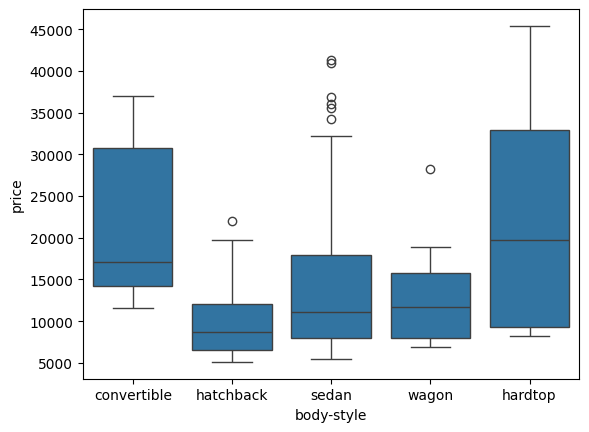

<Figure size 1000x600 with 0 Axes>

In [5]:
# Checking price variation as per symboling
import seaborn as sns
sns.boxplot(x='body-style', y='price', data=df)
#plt.yticks(np.arange(7000,20000,step=5000))
plt.figure(figsize=((10,6)))
plt.show()

In [6]:
def plotboxplot(x, data):
  plt.figure(figsize=(10,6))
  sns.boxplot(x=x, y='price', data=df)
  plt.show()

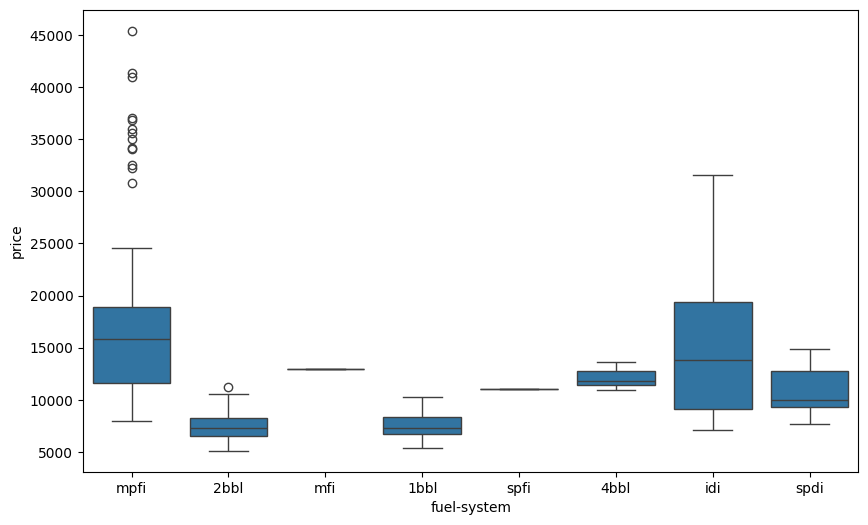

In [7]:
plotboxplot("fuel-system", df)

Visually checked the impact of different categorical features on price. All categorical variables impacting the price except the following. Hence, checking the significance through anova
Check anova for
1. fuel type
2. aspiration
3. num-of-doors

In [8]:
from scipy.stats import f_oneway

def anova(x, data):
  data = data[[x, 'price']]
  grp_data = {i:data['price'][data[x]==i] for i in data[x].unique()}
  F,p = f_oneway(*grp_data.values())

  if p<0.05:
    print(p)
    print("fuel type is significant")
  else:
    print(p)
    print("fuel type is not significant")


In [9]:
anova("num-of-doors", df)

0.5497450927348373
fuel type is not significant


**Fuel type & num of doors are not significant features while aspiration is signifcant.**


In [10]:
def scatterplot(x):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=x, y='price', data=df)
  plt.show()

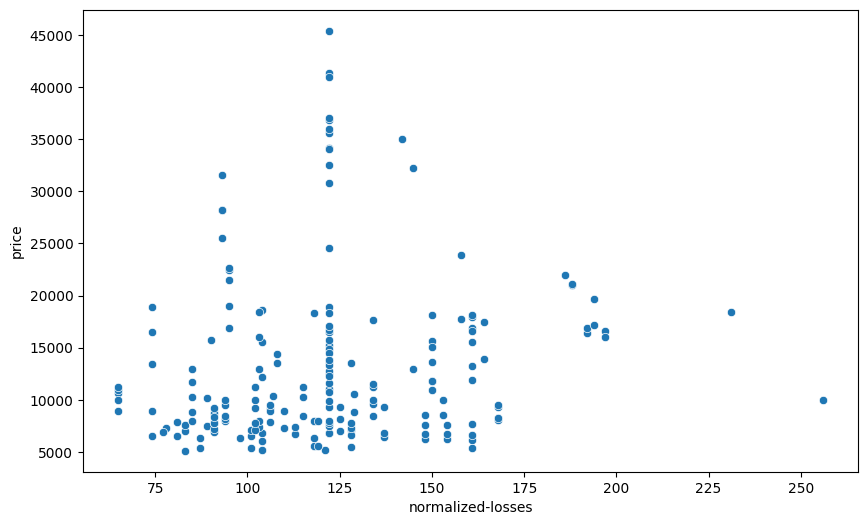

In [11]:
scatterplot('normalized-losses')

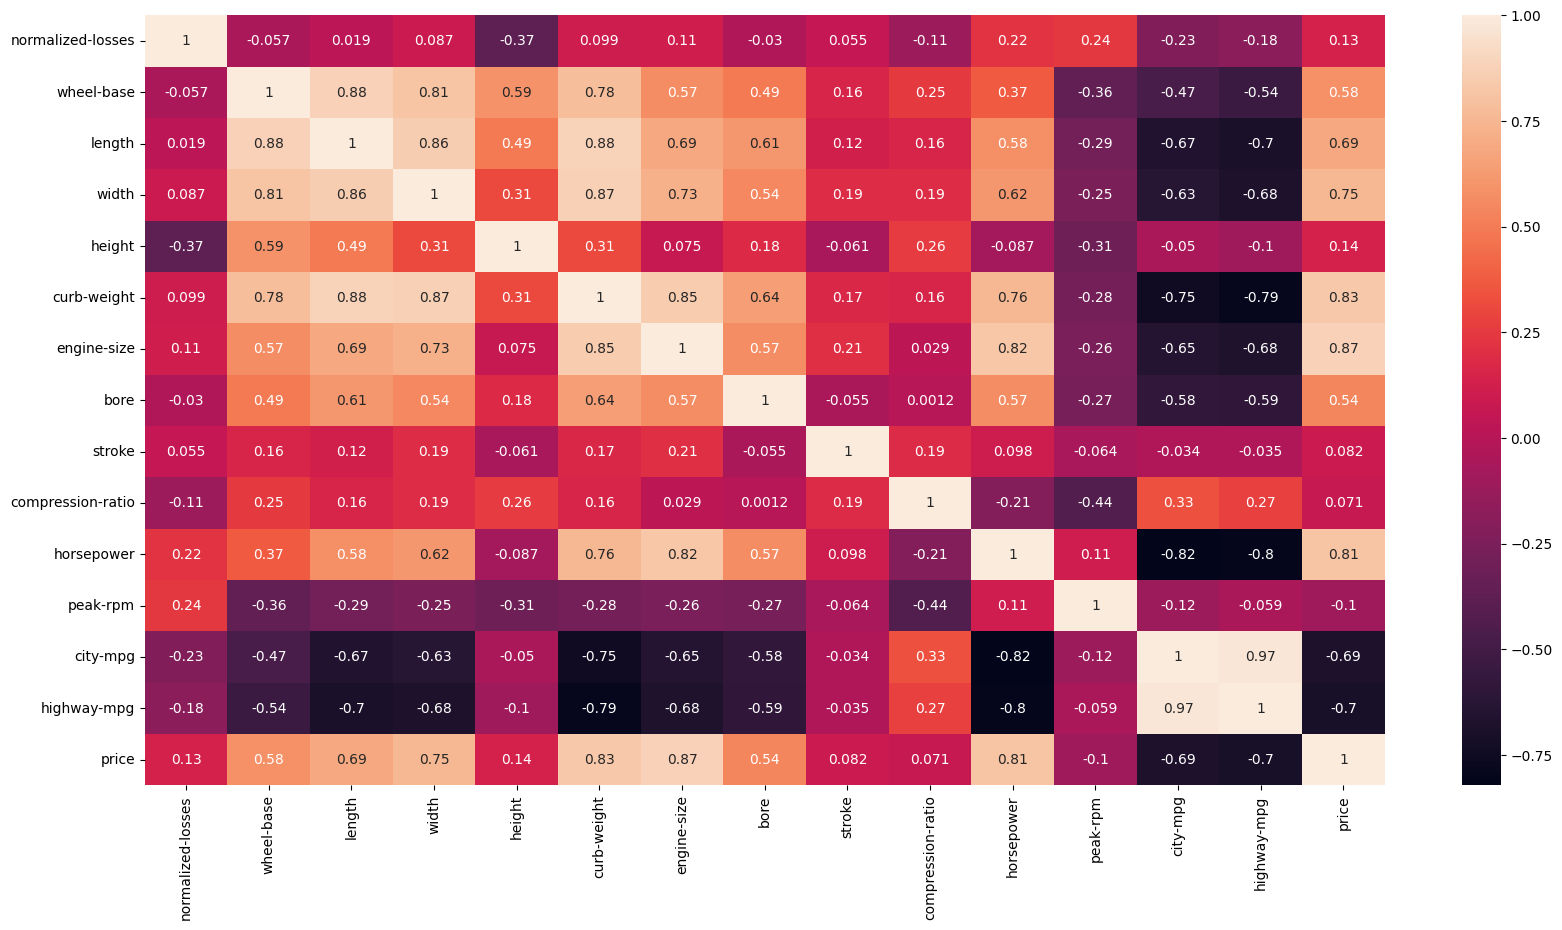

In [20]:
# correlation matrix between scale variables
df_scale = df[['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
corr = df_scale.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True)

plt.show()

Let's not take the following features into consideration
1. normalized-losses
2. height
3. stroke
4. comperssion-ratio
5. peak-rpm

In [21]:
#Dropping few scale features
df.drop(["normalized-losses","height","stroke","compression-ratio","peak-rpm"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         201 non-null    int64  
 1   make              201 non-null    object 
 2   aspiration        201 non-null    object 
 3   body-style        201 non-null    object 
 4   drive-wheels      201 non-null    object 
 5   engine-location   201 non-null    object 
 6   wheel-base        201 non-null    float64
 7   length            201 non-null    float64
 8   width             201 non-null    float64
 9   curb-weight       201 non-null    int64  
 10  engine-type       201 non-null    object 
 11  num-of-cylinders  201 non-null    object 
 12  engine-size       201 non-null    int64  
 13  fuel-system       201 non-null    object 
 14  bore              201 non-null    float64
 15  horsepower        201 non-null    float64
 16  city-mpg          201 non-null    int64  
 1

In [13]:
#Dropping fuel-type & num-of-doors
df.drop(["fuel-type", "num-of-doors"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   engine-location    201 non-null    object 
 7   wheel-base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb-weight        201 non-null    int64  
 12  engine-type        201 non-null    object 
 13  num-of-cylinders   201 non-null    object 
 14  engine-size        201 non-null    int64  
 15  fuel-system        201 non-null    object 
 16  bore               201 non

In [22]:
#Creating dummy variables for categorical features
df_pp = pd.get_dummies(df, columns=['make','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','num-of-cylinders'])
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                201 non-null    int64  
 1   wheel-base               201 non-null    float64
 2   length                   201 non-null    float64
 3   width                    201 non-null    float64
 4   curb-weight              201 non-null    int64  
 5   engine-size              201 non-null    int64  
 6   bore                     201 non-null    float64
 7   horsepower               201 non-null    float64
 8   city-mpg                 201 non-null    int64  
 9   highway-mpg              201 non-null    int64  
 10  price                    201 non-null    int64  
 11  make_alfa-romero         201 non-null    bool   
 12  make_audi                201 non-null    bool   
 13  make_bmw                 201 non-null    bool   
 14  make_chevrolet           2

In [23]:
#Converting all variables into float
df_pp = df_pp.astype("float")
df_pp.head()

,symboling,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,...,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,3.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**4. Data Preprocessing / Standardization**

In [33]:
x = df_pp.drop('price', axis=1)
y = df_pp['price']
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[0:1]

array([[ 1.72504964, -1.6851071 , -0.43940949, -0.85346024, -0.01485764,
         0.07538912,  0.52089447,  0.20398438, -0.65224901, -0.54228772,
         8.1240384 , -0.1754116 , -0.20359464, -0.12309149, -0.21650635,
        -0.26296185, -0.10025094, -0.12309149, -0.30395938, -0.20359464,
        -0.07071068, -0.26296185, -0.31362502, -0.24061325, -0.18995387,
        -0.1424941 , -0.10025094, -0.1754116 , -0.25197632, -0.43514263,
        -0.25197632, -0.24061325,  0.46709937, -0.46709937,  5.70087713,
        -0.20359464, -0.7150372 , -0.9372858 , -0.37688918, -0.20359464,
        -1.19234506,  1.29614814,  0.12309149, -0.12309149,  3.96862697,
        -0.25197632, -1.60912576, -0.28398092, -0.26296185, -0.1424941 ,
        -0.24061325, -0.68348613, -0.12309149, -0.33241125, -0.07071068,
         1.0884772 , -0.21650635, -0.07071068, -0.1424941 , -0.22881438,
         0.52939095, -0.36822985, -0.07071068, -0.07071068, -0.1424941 ]])

In [34]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

**5. Linear Regression Model**

R2 score of 0.96 on training set & -ve R2 score on testing set proves the model is overfitting

In [39]:
#Creating a linear regression model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(x_train, y_train)
yhat = lm.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, yhat)
print(r2)
y_pred = lm.predict(x_train)
r21 = r2_score(y_train, y_pred)
print(r21)

0.9338858274427919
0.9616521417821263


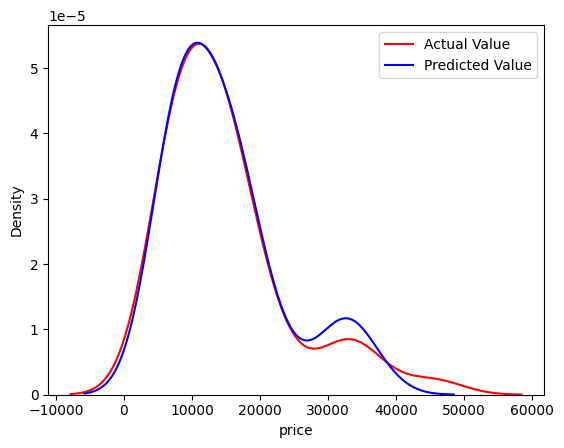

In [40]:
# plotting a distribution plot
ax = sns.kdeplot(y_test, color = 'r', label="Actual Value")
sns.kdeplot(yhat, color='b', label="Predicted Value", ax=ax)
plt.legend()

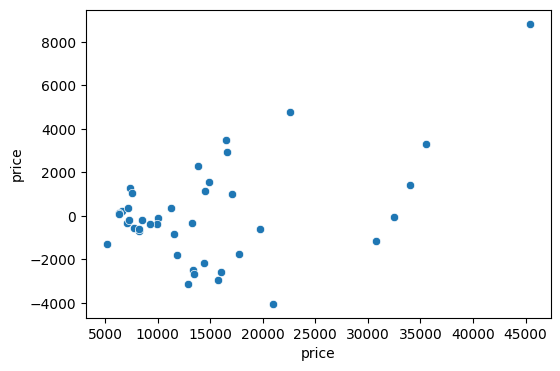

In [44]:
#Plotting a residual plot
plt.figure(figsize=(6,4))
resid = y_test - yhat
sns.scatterplot(x=y_test, y=resid)
plt.show()

From residual plot, For lower price, accuracy is better

**6. Ridge Regression**

In [45]:
# Creating a ridge regression model & GridSearch
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters)
clf.fit(x_train, y_train)
clf.best_params_


{'alpha': 0.1}

In [46]:
best_ridge = clf.best_estimator_
best_ridge

Ridge(alpha=0.1)

In [47]:
best_ridge.score(x_test, y_test)

0.9310045743152703

In [54]:
#Coefficients & intercept to get an equation
coef = best_ridge.coef_.astype("int")
intercept = best_ridge.intercept_.round(0)
print(intercept)
print(coef)

-27891.0
[ -211   146   -82   439     4    28 -2309    68   -65   130  -592  2182
  7347 -1532 -1890  -130 -1927  2207  -356  4094 -3223 -2243  -914 -1695
 -2151  5010 -2114  2042 -1483 -1837  -840    51   -31    31  2895 -1327
  -545  -283  -739    11  -432   420 -2907  2907  -268  -145   705  1423
 -2389   675  -865   579  -169   986  -851    11  -655   964  4412 -1656
 -2240 -1148  1549 -1592   675]
